In [1]:
# update scipy to 1.7.0. run if current used version is lower.
# !pip install scipy==1.7.0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.shape

(800, 13)

In [ ]:
# drop missing value-kolom type 2
df.drop('Type 2', axis=1, inplace=True)
df.shape

(800, 12)

In [ ]:
# visualize label count in each category
for i in ['Type 1', 'Generation', 'Legendary']:
    print(i, ':')
    print(df[i].value_counts())
    print('-'*50)

Type 1 :
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64
--------------------------------------------------
Generation :
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64
--------------------------------------------------
Legendary :
False    735
True      65
Name: Legendary, dtype: int64
--------------------------------------------------


## Tahapan hypothesis testing

1. cek fakta di dataset berkaitan central tendency.
2. temukan variabel yang ingin diuji hipothesis.
3. slicing data untuk menyiapkan variabel.
4. state hypothesis statement **berdasarkan fakta di dataset**.
5. lakukan uji hypothesis.
6. tarik kesimpulan.

## T-test 1 sample 2 tailed

In [ ]:
# tahap 1. cek fakta di dataset
df.groupby('Type 1')['Sp. Atk'].mean()

Type 1
Bug         53.869565
Dark        74.645161
Dragon      96.843750
Electric    90.022727
Fairy       78.529412
Fighting    53.111111
Fire        88.980769
Flying      94.250000
Ghost       79.343750
Grass       77.500000
Ground      56.468750
Ice         77.541667
Normal      55.816327
Poison      60.428571
Psychic     98.403509
Rock        63.340909
Steel       67.518519
Water       74.812500
Name: Sp. Atk, dtype: float64

In [ ]:
# tahap 2 temukan variabel yang ingin di uji hypothesis
# ans: water with sp. atk 74.8125

# tahap 3 siapkan data
# water type pokemon descriptive statistic
# slicing dataframe to get water type pokemon only
water_type = df[df['Type 1']=='Water']

In [ ]:
water_type.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,7,Squirtle,Water,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,630,79,103,120,135,115,78,1,False
59,54,Psyduck,Water,320,50,52,48,65,50,55,1,False


In [ ]:
# descriptive statictics to see central tendency
water_type.describe().T

,count,mean,std,min,25%,50%,75%,max
#,112.0,303.089286,188.440807,7.0,130.00,275.0,456.25,693.0
Total,112.0,430.455357,113.188266,200.0,328.75,455.0,502.25,770.0
HP,112.0,72.062500,27.487026,20.0,52.25,70.0,90.25,170.0
Attack,112.0,74.151786,28.377192,10.0,53.00,72.0,92.00,155.0
Defense,112.0,72.946429,27.773809,20.0,54.50,70.0,88.50,180.0
Sp. Atk,112.0,74.812500,29.030128,10.0,55.00,70.0,90.50,180.0
Sp. Def,112.0,70.517857,28.460493,20.0,50.00,65.0,89.25,160.0
Speed,112.0,65.964286,23.019353,15.0,50.00,65.0,82.00,122.0
Generation,112.0,2.857143,1.558800,1.0,1.00,3.0,4.00,6.0


Water-Type Sp. Atk
- mean = 74.8
- std = 29.03

- median = 70

1. Apakah rata-rata `Sp. Atk` dari pokemon bertipe water berbeda signifikan dari 70?

In [ ]:
# tahap 4. state hypothesis statement

Pokemon bertipe 1 water memiliki rata-rata SP. Atk sebesar 76.88, berdasarkan data tersebut dapat dibuat hipotesis berupa:

- H0 = Rata-rata Sp. Atk tipe Water = 70
- H1 = Rata-rata Sp. Atk tipe Water != 70

In [ ]:
# tahap 5. lakukan uji hypothesis

# ttest 1 sample 2 tailed
t_stat,p_val = stats.ttest_1samp(water_type['Sp. Atk'], 70)

print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.0821200905266741
t-statistics: 1.7544088461853662


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


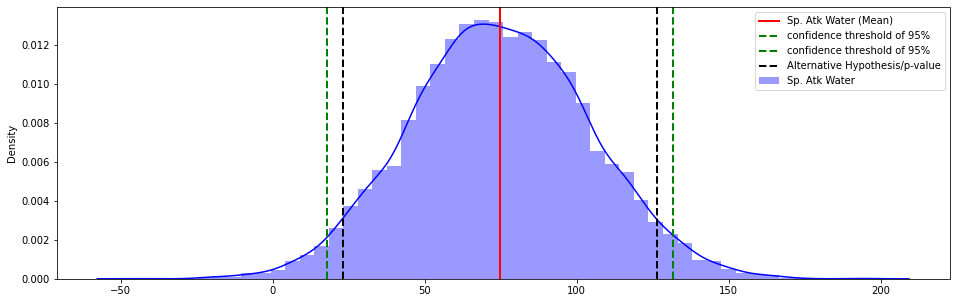

In [ ]:
#simulasi
pop = np.random.normal(water_type['Sp. Atk'].mean(), water_type['Sp. Atk'].std(), 10000)

# confidence interval with critical value 0.05
ci = stats.norm.interval(0.95, water_type['Sp. Atk'].mean(), water_type['Sp. Atk'].std())

plt.figure(figsize=(16,5))
# memvisualisasikan simulasi pdf
sns.distplot(pop, label='Sp. Atk Water', color='blue')
plt.axvline(water_type['Sp. Atk'].mean(), color='red', linewidth=2, label='Sp. Atk Water (Mean)')

# membuat garis confidence interval
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# membuat garis p-value/alternative hypotesis
plt.axvline(pop.mean() + t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis/p-value')
plt.axvline(pop.mean() - t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

## T-test 2 sample 1 Tailed and 2 Tailed

In [ ]:
df.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [ ]:
# slicing/prepare Gen 1 data
Gen_1 = df[df.Generation==1]

# slicing/prepare Gen 4 data
Gen_4 = df[df.Generation==4]

In [ ]:
Gen_1.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.0
mean,75.819277,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,1.0
std,45.153246,115.878076,28.153968,30.744727,28.641336,34.439106,25.505275,29.675857,0.0
min,1.000000,195.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.0
25%,36.250000,325.000000,46.500000,55.000000,50.000000,45.000000,50.000000,50.000000,1.0
50%,76.500000,436.500000,62.000000,75.000000,66.000000,65.000000,70.000000,70.000000,1.0
75%,115.000000,500.000000,80.000000,95.000000,85.000000,95.000000,85.000000,92.250000,1.0
max,151.000000,780.000000,250.000000,190.000000,180.000000,194.000000,130.000000,150.000000,1.0


In [ ]:
Gen_4.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0
mean,442.446281,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843,4.0
std,31.250053,119.556541,25.113604,32.780569,30.145741,31.907047,27.498883,28.475005,0.0
min,387.000000,194.000000,20.000000,5.000000,5.000000,10.000000,30.000000,5.000000,4.0
25%,415.000000,350.000000,55.000000,62.000000,51.000000,54.000000,55.000000,46.000000,4.0
50%,444.000000,485.000000,70.000000,80.000000,72.000000,71.000000,75.000000,77.000000,4.0
75%,471.000000,530.000000,85.000000,103.000000,105.000000,100.000000,100.000000,91.000000,4.0
max,493.000000,720.000000,150.000000,170.000000,168.000000,150.000000,150.000000,135.000000,4.0


Gen_1[`Total`]
- mean: 426.81

Gen_4[`Total`]
- mean: 459.01

## Hypothesis Testing T-Test 2 Sample 1 Tailed
- H0: μ Gen 4 <= μ Gen 1
- H1: μ Gen 4 > μ Gen 1

In [ ]:
# t-test 2 sample 1 tailed
t_stat, p_val = stats.ttest_ind(Gen_4['Total'], Gen_1['Total']) # default H1 = n0 > n1

# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
print('P-value:',p_val/2)
print('t-statistics:',t_stat)

P-value: 0.011260062440665236
t-statistics: 2.2939623663045916


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


236.2107790423914


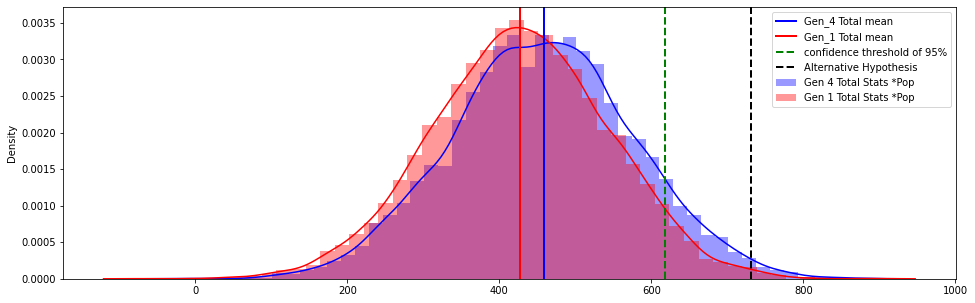

In [ ]:
# simulation
gen_4_pop = np.random.normal(Gen_4['Total'].mean(),Gen_4['Total'].std(),10000)
gen_1_pop = np.random.normal(Gen_1['Total'].mean(),Gen_1['Total'].std(),10000)

# confidence interval based on gen 4
# used cv = 0.05 since 1 tailed, confidence interval 0.90 
ci = stats.norm.interval(0.90, Gen_1['Total'].mean(), Gen_1['Total'].std())

plt.figure(figsize=(16,5))
sns.distplot(gen_4_pop, label='Gen 4 Total Stats *Pop',color='blue')
sns.distplot(gen_1_pop, label='Gen 1 Total Stats *Pop',color='red')

# mean
plt.axvline(Gen_4['Total'].mean(), color='blue', linewidth=2, label='Gen_4 Total mean')
plt.axvline(Gen_1['Total'].mean(), color='red',  linewidth=2, label='Gen_1 Total mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
# plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(gen_4_pop.mean()+t_stat*gen_4_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
# plt.axvline(gen_4_pop.mean()-t_stat*gen_4_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])

## Hypothesis Testing T-Test 2 Sample 2 Tailed

- H0 = Mean of Attack from Gen 4 = Mean of Attack From Gen 1
- H1 = Mean of Attack from Gen 4 != Mean of Attack From Gen 1

In [ ]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(Gen_4['Attack'], Gen_1['Attack'])

# ttest_ind is 2-tailed, we dont need to divide by 2
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.10041663346867609
t-statistics: 1.6481850363938986


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


18.619034006688267


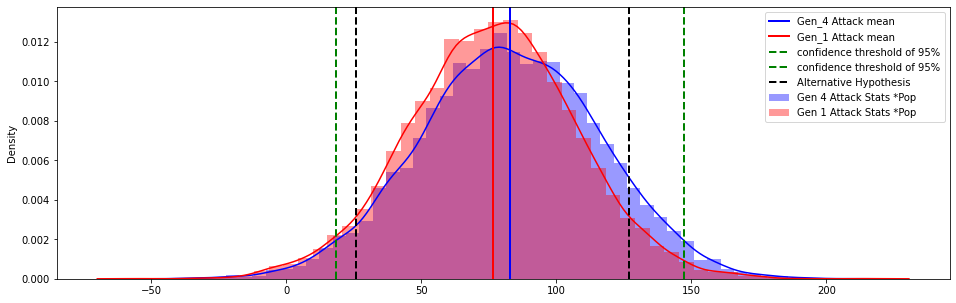

In [ ]:
# simulation
gen_4_pop = np.random.normal(Gen_4['Attack'].mean(),Gen_4['Attack'].std(),10000)
gen_1_pop = np.random.normal(Gen_1['Attack'].mean(),Gen_1['Attack'].std(),10000)

# confidence interval based on gen 4
# used cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, Gen_4['Attack'].mean(), Gen_4['Attack'].std())

plt.figure(figsize=(16,5))
sns.distplot(gen_4_pop, label='Gen 4 Attack Stats *Pop',color='blue')
sns.distplot(gen_1_pop, label='Gen 1 Attack Stats *Pop',color='red')

# mean
plt.axvline(Gen_4['Attack'].mean(), color='blue', linewidth=2, label='Gen_4 Attack mean')
plt.axvline(Gen_1['Attack'].mean(), color='red',  linewidth=2, label='Gen_1 Attack mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(gen_1_pop.mean()+t_stat*gen_1_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(gen_1_pop.mean()-t_stat*gen_1_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])

## Anova

Compare Overall stats (`Total`) from pokemon Gen 1, Gen 2, and Gen 3.

In [ ]:
df.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [ ]:
df.groupby('Generation')['Total'].mean()

Generation
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    436.378049
Name: Total, dtype: float64

In [ ]:
Total_gen_1 = df[df['Generation']==1]['Total']
Total_gen_1.mean()

426.81325301204816

In [ ]:
Total_gen_2 = df[df['Generation']==2]['Total']
Total_gen_2.mean()

418.2830188679245

In [ ]:
Total_gen_3 = df[df['Generation']==3]['Total']
Total_gen_3.mean()

436.225

In [ ]:
f_stat,p_value = stats.f_oneway(Total_gen_1, Total_gen_2, Total_gen_3)
print('P-value:',p_value)

P-value: 0.5095075633438346


In [ ]:
# uji lanjut tukey bila p-val<0.05
from statsmodels.stats import multicomp

help(multicomp.pairwise_tukeyhsd)

Help on function pairwise_tukeyhsd in module statsmodels.stats.multicomp:

pairwise_tukeyhsd(endog, groups, alpha=0.05)
    Calculate all pairwise comparisons with TukeyHSD confidence intervals
    
    Parameters
    ----------
    endog : ndarray, float, 1d
        response variable
    groups : ndarray, 1d
        array with groups, can be string or integers
    alpha : float
        significance level for the test
    
    Returns
    -------
    results : TukeyHSDResults instance
        A results class containing relevant data and some post-hoc
        calculations, including adjusted p-value
    
    Notes
    -----
    This is just a wrapper around tukeyhsd method of MultiComparison
    
    See Also
    --------
    MultiComparison
    tukeyhsd
    statsmodels.sandbox.stats.multicomp.TukeyHSDResults



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
for_tukey = df.query("Generation == 1 | Generation == 2 | Generation == 3")[['Generation', 'Total']]
for_tukey

,Generation,Total
0,1,318
1,1,405
2,1,525
3,1,625
4,1,309
...,...,...
427,3,600
428,3,600
429,3,600
430,3,600


In [ ]:
tukey = multicomp.pairwise_tukeyhsd(endog=for_tukey['Total'], groups=for_tukey['Generation'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -8.5302 0.8296 -45.0332 27.9728  False
     1      3   9.4117 0.7547 -23.1154 41.9389  False
     2      3   17.942 0.4869 -18.8268 54.7107  False
-----------------------------------------------------
